## PythonとTensorFlowでAIを学ぶ (畳み込み層)
### サンプルコード
[参考サイト](https://www.tensorflow.org/tutorials/images/intro_to_cnns?hl=ja)

In [1]:
%matplotlib inline

In [2]:
# import os
# os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import datasets, layers, models, optimizers, losses

2024-02-05 23:21:52.685032: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 23:21:52.728519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 23:21:52.728564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 23:21:52.730325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 23:21:52.744604: I tensorflow/core/platform/cpu_feature_guar

In [4]:
print(tf.__version__)

display(device_lib.list_local_devices())
display(tf.config.list_physical_devices("GPU"))

2.15.0


2024-02-05 23:21:53.531493: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.637822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.637856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.736817: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.736849: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2583162303022819989
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14368636928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 983162233115251768
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

2024-02-05 23:21:53.740248: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.740288: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:53.740297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### MNISTデータの読み込み
MNIST手書き数字データを読み込みます。

In [5]:
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# display(type(train_images), type(train_labels), type(test_images), type(test_labels))

In [6]:
display(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

# 畳み込み層に入力するためにデータを変形
# 28x28 の画像が 1 チャンネル（白黒）なので、最後に 1 を追加
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

### モデルの定義
全結合層を3層重ねたニューラルネットワークを定義します。中間層の活性化関数はReLU、出力層の活性化関数はSoftmaxです。

In [7]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

2024-02-05 23:21:54.133881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:54.133948: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:54.133961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:54.134130: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 23:21:54.134144: I tensorflow/core/common_runtime/gpu/gpu

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 10)                216330    
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 学習

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=2048)

Epoch 1/5


/home/sonoda/GitHub/investment-study/.tf/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-02-05 23:21:55.732783: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-05 23:21:55.862984: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-05 23:21:56.085247: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8adc817070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-05 23:21:56.085274: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-02-05 23:21:56.089477: I tensorflow/compiler/mlir/t

30/30 [==============================] - 2s 20ms/step - loss: 0.9477 - accuracy: 0.7828
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3131 - accuracy: 0.9090
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2399 - accuracy: 0.9319
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1951 - accuracy: 0.9453
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1628 - accuracy: 0.9550


### テストデータで評価
訓練データの精度はあくまで参考値です。未知のデータに対する精度を確認するために、テストデータで評価します。

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1461 - accuracy: 0.9593 - 501ms/epoch - 2ms/step

Test accuracy: 0.9592999815940857


### データごとに正解・不正解を表示

In [11]:
def plot_image(ax, i, predictions_array, true_label, img):
    """
    画像を表示する。

    Args:
        ax (matplotlib.axes.Axes): 表示するAxes
        i (int): 表示する画像のインデックス
        predictions_array (np.ndarray): 予測結果
        true_label (np.ndarray): 正解ラベル
        img (np.ndarray): 画像
    """
    true_label, img = true_label[i], img[i]
    ax.imshow(img, cmap=plt.cm.binary)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    ax.set_xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", color=color)

def plot_value_array(ax, i, predictions_array, true_label):
    true_label = true_label[i]
    ax.grid(False)
    ax.set_xticks(range(10))
    ax.set_yticks([])
    
    thisplot = ax.bar(range(10), predictions_array, color="#777777")
    ax.set_ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 0s 775us/step


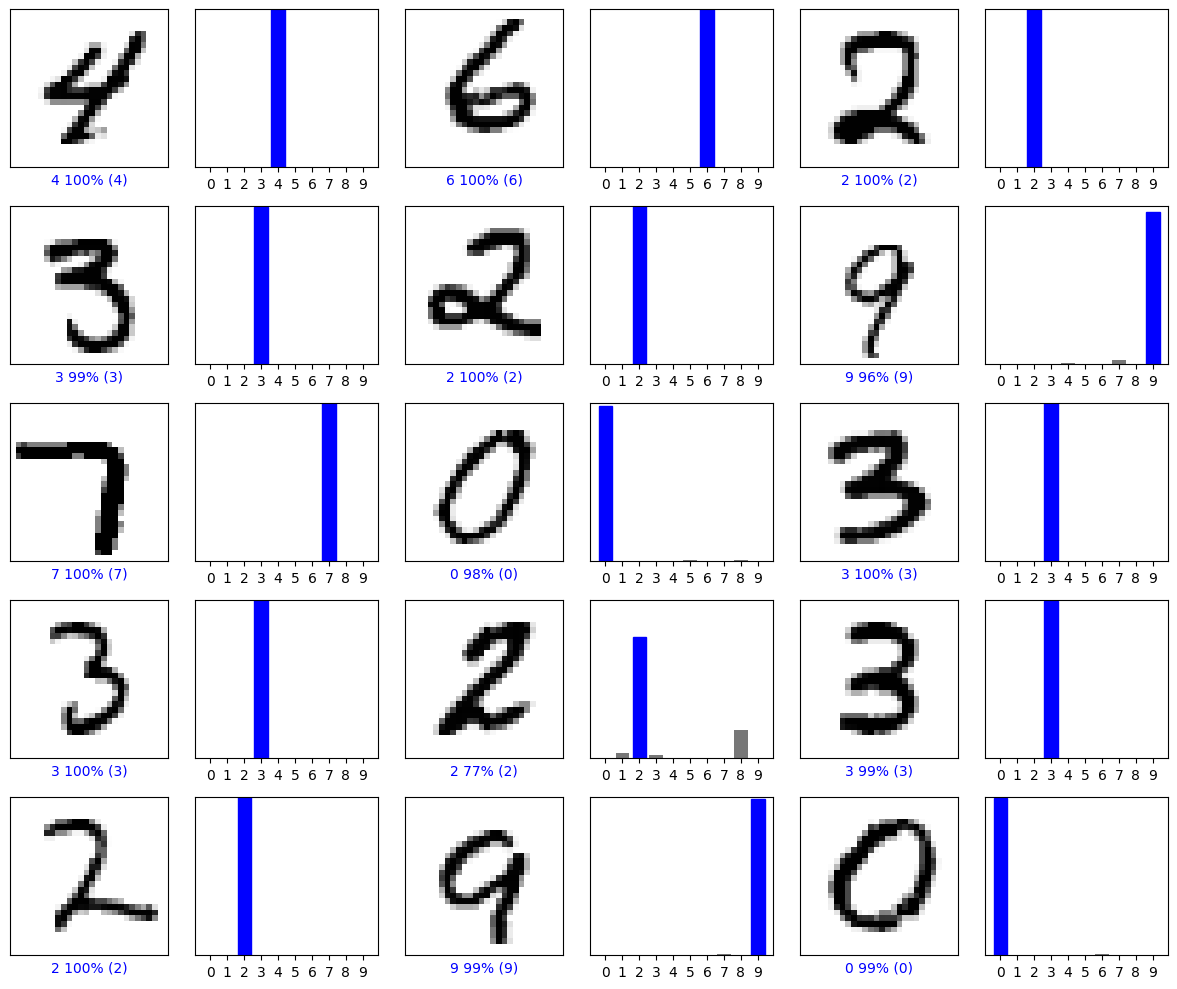

In [12]:
predictions = model.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(2*2*num_cols, 2*num_rows))

for i, idx in enumerate(random_indices):
    # idx = i
    plot_image(axes[i//num_cols, 2*(i%num_cols)], idx, predictions[idx], test_labels, test_images)
    plot_value_array(axes[i//num_cols, 2*(i%num_cols) + 1], idx, predictions[idx], test_labels)

fig.tight_layout()
plt.show()

### NumPyだけで実装してみる

In [13]:
class LayerBase:
    """
    レイヤーの基底クラス。
    """
    def __init__(self):
        pass

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力。

        Returns:
            np.ndarray: 出力。
        """
        raise NotImplementedError()

    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配。

        Returns:
            tuple: 入力やパラメータの勾配。
        """
        raise NotImplementedError()

### ReLU

In [14]:
class ReLU(LayerBase):
    """
    ReLU レイヤー。
    """
    def __init__(self):
        self.mask = None # ノードが発火したかどうかのフラグ
        
    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力。

        Returns:
            np.ndarray: 出力。
        """
        self.mask = (X <= 0) # マスクを保存
        Z = X.copy()
        Z[self.mask] = 0
        return Z

    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配。

        Returns:
            np.ndarray: 入力の勾配。
        """
        d_A[self.mask] = 0
        return d_A

### 畳み込み層

In [15]:
class Convolution2D(LayerBase):
    """
    2D 畳み込み層。NumPy で実装する。
    """
    def __init__(self, input_shape, kernel_size, depth, stride=1, activation: LayerBase=None):
        """
        畳み込み層の初期化。

        Args:
            input_shape (tuple): 入力の形状 (height, width, channels)
            kernel_size (int): カーネルのサイズ
            depth (int): カーネルの数
            stride (int): ストライド
            activation (LayerBase): 活性化関数
        """
        self.input_shape = input_shape
        self.kernel_size = kernel_size
        self.depth = depth
        self.stride = stride
        self.kernels = np.random.randn(depth, kernel_size, kernel_size, input_shape[2]) * 0.1
        self.biases = np.zeros(depth)
        self.input_data = None # 順伝播時の入力を保持
        self.grad_kernels = None # 逆伝播時のカーネルの勾配を保持
        self.grad_biases = None # 逆伝播時のバイアスの勾配を保持
        self.activation = activation # 活性化関数
        self.initialize_optimizer_params()
    
    def initialize_optimizer_params(self):
        """
        Adamオプティマイザのパラメータを初期化。
        """
        self.m_kernels = np.zeros_like(self.kernels)
        self.v_kernels = np.zeros_like(self.kernels)
        self.m_biases = np.zeros_like(self.biases)
        self.v_biases = np.zeros_like(self.biases)
        self.t = 0 # タイムステップ

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, height, width, channels)
        
        Returns:
            np.ndarray: 出力データ (batch_size, A_height, A_width, depth)
        """
        batch_size, height, width, _ = X.shape
        A_height = (height - self.kernel_size) // self.stride + 1
        A_width = (width - self.kernel_size) // self.stride + 1

        # 出力特徴量マップの初期化
        A = np.zeros((batch_size, A_height, A_width, self.depth))

        # 畳み込み演算
        for i in range(A_height):
            for j in range(A_width):
                h_start = i * self.stride
                w_start = j * self.stride
                # カーネルを適用するパッチ (カーネルと同じ形状の入力の一部分) を取得
                patch = X[:, h_start:h_start+self.kernel_size, w_start:w_start+self.kernel_size, :]
                # 縦軸、横軸、チャネルごとにかけて足し合わせる
                A[:, i, j, :] = np.tensordot(patch, self.kernels, axes=([1, 2, 3], [1, 2, 3]))
                # # 出力のチャネルごとに畳み込み演算
                # for k in range(self.depth):
                #     # パッチとカーネルのアダマール積を取り、その和を出力の対応する位置に格納
                #     A[:, i, j, k] = np.sum(patch * self.kernels[k, :, :, :], axis=(1, 2, 3))
        
        # バイアスの加算
        A += self.biases[np.newaxis, np.newaxis, np.newaxis, :]

        # 活性化関数の適用
        if self.activation is not None:
            A = self.activation.forward(A)

        # 入力データを保存
        self.input_data = X

        return A
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, A_height, A_width, depth)

        Returns:
            np.ndarray: 入力の勾配 (batch_size, height, width, channels)
        """
        # 保存した入力データを使用
        X = self.input_data

        _, height, width, _ = X.shape
        A_height = (height - self.kernel_size) // self.stride + 1
        A_width = (width - self.kernel_size) // self.stride + 1

        # 入力の勾配の初期化
        d_X = np.zeros(X.shape)
        d_kernels = np.zeros_like(self.kernels)
        d_biases = np.zeros_like(self.biases)

        # 活性化関数の逆伝播
        if self.activation is not None:
            d_A = self.activation.backward(d_A)

        # 勾配の計算
        for i in range(A_height):
            for j in range(A_width):
                h_start = i * self.stride
                w_start = j * self.stride
                # カーネルを適用するパッチ (カーネルと同じ形状の入力の一部分) を取得
                patch = X[:, h_start:h_start+self.kernel_size, w_start:w_start+self.kernel_size, :]
                # バッチ軸に沿って、パッチと出力の勾配をかけて足し合わせる
                d_kernels_temp = np.tensordot(patch, d_A[:, i, j, :], axes=([0], [0])) # (kernel_size, kernel_size, depth, batch_size)
                d_kernels_temp = np.moveaxis(d_kernels_temp, -1, 0) # (batch_size, kernel_size, kernel_size, depth)
                # これをすべてのi, j（出力の行と列）について足し合わせる
                d_kernels += d_kernels_temp
                # バイアスの勾配を計算して加算
                d_biases += np.sum(d_A[:, i, j, :], axis=0)
                # 出力チャネルの軸に沿って、カーネルと出力の勾配をかけて足し合わせる
                d_X_temp = np.tensordot(self.kernels, d_A[:, i, j, :], axes=([0], [1])) # (kernel_size, kernel_size, channels, batch_size)
                d_X_temp = np.moveaxis(d_X_temp, -1, 0) # (batch_size, kernel_size, kernel_size, channels)
                # これをすべてのi, j（出力の行と列）について、入力の適切な場所に足し合わせる
                d_X[:, h_start:h_start+self.kernel_size, w_start:w_start+self.kernel_size, :] += d_X_temp
                # # 出力のチャネルごとに勾配を計算して加算
                # for k in range(self.depth):
                #     d_kernels[k, :, :, :] += np.sum(patch * (d_A[:, i:i+1, j:j+1, k:k+1]), axis=0)
                #     d_biases[k] += np.sum(d_A[:, i, j, k])
                #     d_X[:, h_start:h_start+self.kernel_size, w_start:w_start+self.kernel_size, :] += self.kernels[k, :, :, :] * (d_A[:, i:i+1, j:j+1, k:k+1])
        
        # パラメータの勾配を保存
        self.grad_kernels = d_kernels
        self.grad_biases = d_biases
        
        return d_X
    
    def update_params(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        パラメータの更新。

        Args:
            learning_rate (float): 学習率
            beta1 (float): 一階モーメントの減衰率
            beta2 (float): 二階モーメントの減衰率
            epsilon (float): 数値安定化のための微小値
        """
        self.t += 1
        
        self.m_kernels = beta1 * self.m_kernels + (1 - beta1) * self.grad_kernels
        self.v_kernels = beta2 * self.v_kernels + (1 - beta2) * np.square(self.grad_kernels)
        self.m_biases = beta1 * self.m_biases + (1 - beta1) * self.grad_biases
        self.v_biases = beta2 * self.v_biases + (1 - beta2) * np.square(self.grad_biases)

        m_kernels_corrected = self.m_kernels / (1 - beta1 ** self.t)
        v_kernels_corrected = self.v_kernels / (1 - beta2 ** self.t)
        m_biases_corrected = self.m_biases / (1 - beta1 ** self.t)
        v_biases_corrected = self.v_biases / (1 - beta2 ** self.t)

        self.kernels -= learning_rate * m_kernels_corrected / (np.sqrt(v_kernels_corrected) + epsilon)
        self.biases -= learning_rate * m_biases_corrected / (np.sqrt(v_biases_corrected) + epsilon)


In [16]:
# 簡易的な動作チェック
input_sample = train_images[:10]
# input_sample = np.arange(28*28*3*10).reshape(10, 28, 28, 3)
display(input_sample.shape)
input_shape = (input_sample.shape[1], input_sample.shape[2], input_sample.shape[3])
conv_layer = Convolution2D(input_shape=input_shape, kernel_size=3, depth=32, stride=1, activation=ReLU())
output_sample = conv_layer.forward(input_sample)
display(output_sample.shape)
d_A_sample = np.random.randn(*output_sample.shape)
d_X_sample = conv_layer.backward(d_A_sample)
display(d_X_sample.shape)
conv_layer.update_params()

(10, 28, 28, 1)

(10, 26, 26, 32)

(10, 28, 28, 1)

### np.tensordot()の使用例
非常にややこしいです。

In [17]:
# tensordot演算とは？
BATCH_SIZE = 2
kernel_size = 3
channels = 2
depth = 2

patch = np.arange(BATCH_SIZE * kernel_size * kernel_size * channels).reshape(BATCH_SIZE, kernel_size, kernel_size, channels) # (batch_size, kernel_size, kernel_size, channels)
kernels = np.arange(depth * kernel_size * kernel_size * channels).reshape(depth, kernel_size, kernel_size, channels) # (depth, kernel_size, kernel_size, channels)

# tensordot演算
# patch の (1, 2, 3) 軸と kernels の (1, 2, 3) 軸をかけて足し合わせる
output = np.tensordot(patch, kernels, axes=([1, 2, 3], [1, 2, 3])).reshape(BATCH_SIZE, 1, 1, depth)

print(f"patch=\n{patch}\nkernels=\n{kernels}\noutput=\n{output}")

patch=
[[[[ 0  1]
   [ 2  3]
   [ 4  5]]

  [[ 6  7]
   [ 8  9]
   [10 11]]

  [[12 13]
   [14 15]
   [16 17]]]


 [[[18 19]
   [20 21]
   [22 23]]

  [[24 25]
   [26 27]
   [28 29]]

  [[30 31]
   [32 33]
   [34 35]]]]
kernels=
[[[[ 0  1]
   [ 2  3]
   [ 4  5]]

  [[ 6  7]
   [ 8  9]
   [10 11]]

  [[12 13]
   [14 15]
   [16 17]]]


 [[[18 19]
   [20 21]
   [22 23]]

  [[24 25]
   [26 27]
   [28 29]]

  [[30 31]
   [32 33]
   [34 35]]]]
output=
[[[[ 1785  4539]]]


 [[[ 4539 13125]]]]


In [18]:
# tensordot演算の結果をfor文で再現
output = np.zeros((BATCH_SIZE, 1, 1, depth))
for i in range(BATCH_SIZE):
    for j in range(depth):
        print(f"patch[{i}]=\n{patch[i]}\nkernels[{j}]=\n{kernels[j]}")
        output[i, 0, 0, j] = np.sum(patch[i] * kernels[j])

print(f"output=\n{output}")

patch[0]=
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]
kernels[0]=
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]
patch[0]=
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]
kernels[1]=
[[[18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]]

 [[30 31]
  [32 33]
  [34 35]]]
patch[1]=
[[[18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]]

 [[30 31]
  [32 33]
  [34 35]]]
kernels[0]=
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]
patch[1]=
[[[18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]]

 [[30 31]
  [32 33]
  [34 35]]]
kernels[1]=
[[[18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]]

 [[30 31]
  [32 33]
  [34 35]]]
output=
[[[[ 1785.  4539.]]]


 [[[ 4539. 13125.]]]]


In [19]:
# 逆伝播での tensordot 演算
d_A_element = np.arange(BATCH_SIZE * depth).reshape(BATCH_SIZE, depth) # (batch_size, depth)

# tensordot演算
# patch の (0) 軸と d_A_element の (1) 軸をかけて足し合わせる
d_kernels = np.tensordot(patch, d_A_element, axes=([0], [0]))
d_kernels = np.moveaxis(d_kernels, -1, 0)
print(f"d_A_element=\n{d_A_element}\nd_kernels=\n{d_kernels}")

d_A_element=
[[0 1]
 [2 3]]
d_kernels=
[[[[ 36  38]
   [ 40  42]
   [ 44  46]]

  [[ 48  50]
   [ 52  54]
   [ 56  58]]

  [[ 60  62]
   [ 64  66]
   [ 68  70]]]


 [[[ 54  58]
   [ 62  66]
   [ 70  74]]

  [[ 78  82]
   [ 86  90]
   [ 94  98]]

  [[102 106]
   [110 114]
   [118 122]]]]


### マックスプーリング層

In [20]:
class MaxPooling2D(LayerBase):
    """
    2D マックスプーリング層。NumPy で実装する。
    """
    def __init__(self, pool_size, stride):
        """
        マックスプーリング層の初期化。

        Args:
            pool_size (int): プーリングのサイズ
            stride (int): ストライド
        """
        self.pool_size = pool_size
        self.stride = stride
        self.input_data = None # 順伝播時の入力を保持

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, height, width, channels)
        
        Returns:
            np.ndarray: 出力データ (batch_size, A_height, A_width, channels)
        """
        batch_size, height, width, channels = X.shape
        A_height = (height - self.pool_size) // self.stride + 1
        A_width = (width - self.pool_size) // self.stride + 1

        # 出力特徴量マップの初期化
        A = np.zeros((batch_size, A_height, A_width, channels))

        # プーリング演算
        for i in range(A_height):
            for j in range(A_width):
                h_start = i * self.stride
                w_start = j * self.stride
                # プーリングするパッチを取得
                patch = X[:, h_start:h_start+self.pool_size, w_start:w_start+self.pool_size, :]
                # チャネルごとに最大値を取得
                A[:, i, j, :] = np.max(patch, axis=(1, 2))
        
        # 入力データを保存
        self.input_data = X
        
        return A
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, A_height, A_width, channels)

        Returns:
            np.ndarray: 入力の勾配
        """
        # 保存した入力データを使用
        X = self.input_data
        
        _, height, width, _ = X.shape
        A_height = (height - self.pool_size) // self.stride + 1
        A_width = (width - self.pool_size) // self.stride + 1

        # 入力の勾配の初期化
        d_X = np.zeros(X.shape)

        # 勾配の計算
        for i in range(A_height):
            for j in range(A_width):
                h_start = i * self.stride
                w_start = j * self.stride
                # プーリングするパッチを取得
                patch = X[:, h_start:h_start+self.pool_size, w_start:w_start+self.pool_size, :]
                max_values = np.max(patch, axis=(1, 2), keepdims=True)
                # パッチ内で最大値を取得した場所を取得
                mask = patch == max_values
                # パッチ内で最大値を取得した場所だけ、出力の勾配を入力の対応する場所に足し合わせる
                d_X[:, h_start:h_start+self.pool_size, w_start:w_start+self.pool_size, :] += mask * d_A[:, i:i+1, j:j+1, :]
        
        return d_X

In [21]:
# 簡易的な動作チェック
# input_sample = train_images[:10]
input_sample = np.arange(28*28*3*10).reshape(10, 28, 28, 3)
display(input_sample.shape)
max_pooling_layer = MaxPooling2D(pool_size=2, stride=2)
output_sample = max_pooling_layer.forward(input_sample)
display(output_sample.shape)
d_A_sample = np.random.randn(*output_sample.shape)
d_X_sample = max_pooling_layer.backward(d_A_sample)
display(d_X_sample.shape)

(10, 28, 28, 3)

(10, 14, 14, 3)

(10, 28, 28, 3)

### 平滑化層

In [22]:
class Flatten(LayerBase):
    """
    平滑化層。NumPy で実装する。
    二次元配列を一次元配列に変換する。
    """
    def __init__(self):
        self.input_shape = None # 順伝播時の入力形状を保持

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, height, width, channels)
        
        Returns:
            np.ndarray: 出力データ (batch_size, height * width * channels)
        """
        # 入力形状を保存
        self.input_shape = X.shape
        
        return X.reshape(X.shape[0], -1)
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, height * width * channels)

        Returns:
            np.ndarray: 入力の勾配
        """
        return d_A.reshape(self.input_shape)

In [23]:
# 簡易的な動作チェック
input_sample = train_images[:10]
# input_sample = np.arange(28*28*3*10).reshape(10, 28, 28, 3)
display(input_sample.shape)
flatten_layer = Flatten()
output_sample = flatten_layer.forward(input_sample)
display(output_sample.shape)
d_A_sample = np.random.randn(*output_sample.shape)
d_X_sample = flatten_layer.backward(d_A_sample)
display(d_X_sample.shape)

(10, 28, 28, 1)

(10, 784)

(10, 28, 28, 1)

### 全結合層

In [24]:
class Dense(LayerBase):
    """
    全結合層。NumPy で実装する。
    """
    def __init__(self, input_dim, output_dim, activation: LayerBase=None):
        """
        全結合層の初期化。

        Args:
            input_dim (int): 入力の次元
            output_dim (int): 出力の次元
            activation (LayerBase): 活性化関数
        """
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weights = np.random.randn(input_dim, output_dim) * 0.1
        self.biases = np.zeros(output_dim)
        self.input_data = None # 順伝播時の入力を保持
        self.grad_weights = None # 逆伝播時の重みの勾配を保持
        self.grad_biases = None # 逆伝播時のバイアスの勾配を保持
        self.activation = activation # 活性化関数
        self.initialize_adam_params()
    
    def initialize_adam_params(self):
        """
        Adamオプティマイザのパラメータを初期化。
        """
        self.m_weights = np.zeros_like(self.weights)
        self.v_weights = np.zeros_like(self.weights)
        self.m_biases = np.zeros_like(self.biases)
        self.v_biases = np.zeros_like(self.biases)
        self.t = 0

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, input_dim)
        
        Returns:
            np.ndarray: 出力データ (batch_size, output_dim)
        """
        Z = X @ self.weights + self.biases

        if self.activation is not None:
            A = self.activation.forward(Z)
        else:
            A = Z

        # 入力データを保存
        self.input_data = X

        return A
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, output_dim)

        Returns:
            np.ndarray: 入力の勾配
        """
        # 保存した入力データを使用
        X = self.input_data

        if self.activation is not None:
            d_A = self.activation.backward(d_A)

        d_X = d_A @ self.weights.T
        d_weights = X.T @ d_A
        d_biases = np.sum(d_A, axis=0)

        self.grad_weights = d_weights
        self.grad_biases = d_biases
        return d_X
    
    def update_params(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        パラメータの更新。

        Args:
            learning_rate (float): 学習率
            beta1 (float): 一階モーメントの減衰率
            beta2 (float): 二階モーメントの減衰率
            epsilon (float): 数値安定化のための微小値
        """
        # SGD
        # self.weights -= learning_rate * self.grad_weights
        # self.biases -= learning_rate * self.grad_biases

        self.t += 1
        self.m_weights = beta1 * self.m_weights + (1 - beta1) * self.grad_weights
        self.v_weights = beta2 * self.v_weights + (1 - beta2) * np.square(self.grad_weights)
        m_weights_corrected = self.m_weights / (1 - beta1 ** self.t)
        v_weights_corrected = self.v_weights / (1 - beta2 ** self.t)
        self.weights -= learning_rate * m_weights_corrected / (np.sqrt(v_weights_corrected) + epsilon)

        self.m_biases = beta1 * self.m_biases + (1 - beta1) * self.grad_biases
        self.v_biases = beta2 * self.v_biases + (1 - beta2) * np.square(self.grad_biases)
        m_biases_corrected = self.m_biases / (1 - beta1 ** self.t)
        v_biases_corrected = self.v_biases / (1 - beta2 ** self.t)
        self.biases -= learning_rate * m_biases_corrected / (np.sqrt(v_biases_corrected) + epsilon)

In [25]:
# 簡易的な動作チェック
input_sample = train_images[:10].reshape(10, 28*28)
display(input_sample.shape)
dense_layer = Dense(input_dim=28*28, output_dim=5, activation=ReLU())
output_sample = dense_layer.forward(input_sample)
display(output_sample.shape)
d_A_sample = np.random.randn(*output_sample.shape)
d_X_sample = dense_layer.backward(d_A_sample)
display(d_X_sample.shape)
dense_layer.update_params()

(10, 784)

(10, 5)

(10, 784)

### ソフトマックス

In [26]:
class Softmax(LayerBase):
    """
    ソフトマックス層。NumPy で実装する。
    """
    def __init__(self):
        self.output_data = None # 順伝播時の出力を保持

    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, input_dim)
        
        Returns:
            np.ndarray: 出力データ (batch_size, input_dim)
        """
        # オーバーフロー対策のため、入力信号の最大値を引く
        X_max = np.max(X, axis=1, keepdims=True)
        exp_X = np.exp(X - X_max)
        A = exp_X / np.sum(exp_X, axis=1, keepdims=True)

        # 出力データを保存
        self.output_data = A

        return A
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, input_dim)

        Returns:
            np.ndarray: 入力の勾配
        """
        A = self.output_data
        d_X = np.zeros_like(A)

        # バッチごとに計算
        for i in range(A.shape[0]):
            # ソフトマックス関数の偏微分は、i と j が同じ場合と異なる場合で場合分け
            d_X[i] = (np.diag(A[i]) - np.outer(A[i], A[i])) @ d_A[i]

        return d_X

In [27]:
# 簡易的な動作チェック
input_sample = np.array([[2, 2, 3], [4, 5, 10]])
display(input_sample)
softmax_layer = Softmax()
output_sample = softmax_layer.forward(input_sample)
display(output_sample)
Y_sample = np.array([[0, 0, 1], [0, 0, 1]])
d_A_sample = - Y_sample / (output_sample + 1e-7)
d_X_sample = softmax_layer.backward(d_A_sample)
display(d_X_sample)

array([[ 2,  2,  3],
       [ 4,  5, 10]])

array([[0.21194156, 0.21194156, 0.57611688],
       [0.00245611, 0.00667641, 0.99086747]])

array([[ 0.21194152,  0.21194152, -0.42388304],
       [ 0.00245611,  0.00667641, -0.00913253]])

### 組み合わせてモデルを構築

In [28]:
class ConvolutionalNeuralNetwork(LayerBase):
    """
    畳み込みニューラルネットワーク。
    """
    def __init__(self, input_shape, num_classes):
        """
        畳み込みニューラルネットワークの初期化。

        Args:
            input_shape (tuple): 入力の形状 (height, width, channels)
            num_classes (int): クラス数
        """
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.layers = [
            Convolution2D(input_shape=input_shape, kernel_size=3, depth=32, stride=1, activation=ReLU()),
            MaxPooling2D(pool_size=2, stride=2),
            Convolution2D(input_shape=(14, 14, 32), kernel_size=3, depth=64, stride=1, activation=ReLU()),
            MaxPooling2D(pool_size=2, stride=2),
            Flatten(),
            Dense(5*5*64, 64, activation=ReLU()),
            Dense(64, num_classes, activation=Softmax()),
            # Dense(28*28, 16, activation=ReLU()),
            # Dense(16, 16, activation=ReLU()),
            # Dense(16, num_classes, activation=Softmax()),
            # Dense(26*26*32, num_classes, activation=Softmax())
        ]
    
    def forward(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データ (batch_size, height, width, channels)
        
        Returns:
            np.ndarray: 出力データ (batch_size, num_classes)
        """
        for layer in self.layers:
            # print(X.shape)
            X = layer.forward(X)
        return X
    
    def backward(self, d_A):
        """
        逆伝播。

        Args:
            d_A (np.ndarray): 出力の勾配 (batch_size, num_classes)

        Returns:
            np.ndarray: 入力の勾配
        """
        for layer in reversed(self.layers):
            d_A = layer.backward(d_A)
        return d_A
    
    def update_params(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        パラメータの更新。(Adam)

        Args:
            learning_rate (float): 学習率
            beta1 (float): 一階モーメントの減衰率
            beta2 (float): 二階モーメントの減衰率
            epsilon (float): 数値安定化のための微小値
        """
        for layer in self.layers:
            if hasattr(layer, "update_params"):
                layer.update_params(learning_rate, beta1, beta2, epsilon)

In [29]:
# 簡易的な動作チェック
input_sample = train_images[:3]
display(input_sample.shape)
input_shape = (input_sample.shape[1], input_sample.shape[2], input_sample.shape[3])
model = ConvolutionalNeuralNetwork(input_shape=input_shape, num_classes=10)
output_sample = model.forward(input_sample)
display(output_sample.shape)
display(output_sample)
y_sample = np.eye(10)[test_labels[:3]]
display(y_sample)
d_A_sample = - y_sample / (output_sample + 1e-7)
display(d_A_sample)
d_X_sample = model.backward(d_A_sample)
display(d_X_sample.shape)
model.update_params()

(3, 28, 28, 1)

(3, 10)

array([[0.07283408, 0.13054078, 0.16547586, 0.12736179, 0.0518714 ,
        0.08007052, 0.04009567, 0.11608951, 0.10840675, 0.10725363],
       [0.07678572, 0.16748428, 0.11644161, 0.10804691, 0.05690874,
        0.07762115, 0.04125746, 0.12376011, 0.11474316, 0.11695085],
       [0.05939647, 0.12809887, 0.09808947, 0.09551042, 0.05943528,
        0.1181295 , 0.06948532, 0.19681378, 0.07608184, 0.09895905]])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -8.61403496, -0.        , -0.        ],
       [-0.        , -0.        , -8.58798814, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -7.80646394, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

(3, 28, 28, 1)

In [30]:
# モデルの学習
# ハイパーパラメータ
EPOCHS = 2
BATCH_SIZE = 64

# モデルの初期化
input_shape = (28, 28, 1)
num_classes = 10
model = ConvolutionalNeuralNetwork(input_shape=input_shape, num_classes=num_classes)

# 学習
num_batches = len(train_images) // BATCH_SIZE
check_batches = np.linspace(0, num_batches - 1, 11).astype(int)[1:]
for epoch in range(EPOCHS):
    total_loss = 0.0
    total_accuracy = 0.0
    
    for batch in range(num_batches):
        start_idx = batch * BATCH_SIZE
        # end_idx = min(start_idx + BATCH_SIZE, len(train_images)) # 最後のバッチの端数を考慮
        end_idx = start_idx + BATCH_SIZE
        # ミニバッチの取得
        X = train_images[start_idx:end_idx]
        Y = np.eye(num_classes)[train_labels[start_idx:end_idx]]

        # 順伝播
        A = model.forward(X)

        # 損失
        loss = -np.sum(Y * np.log(A + 1e-7)) / BATCH_SIZE

        # 逆伝播
        d_A = (- Y / (A + 1e-7)) / BATCH_SIZE
        model.backward(d_A)

        # パラメータの更新
        model.update_params(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)

        total_loss += loss
        total_accuracy += np.sum(np.argmax(A, axis=1) == train_labels[start_idx:end_idx]) / BATCH_SIZE

        # バッチ数の10%ごとに損失を表示
        if batch in check_batches:
            print(f"Epoch {epoch+1}/{EPOCHS}, Batch {batch+1}/{num_batches}, Loss {total_loss/(batch+1):.4f}, Accuracy {total_accuracy/(batch+1):.4f}")


Epoch 1/2, Batch 94/937, Loss 0.7608, Accuracy 0.7859
Epoch 1/2, Batch 188/937, Loss 0.5100, Accuracy 0.8541
Epoch 1/2, Batch 281/937, Loss 0.4014, Accuracy 0.8835
Epoch 1/2, Batch 375/937, Loss 0.3302, Accuracy 0.9038
Epoch 1/2, Batch 469/937, Loss 0.2872, Accuracy 0.9164
Epoch 1/2, Batch 562/937, Loss 0.2557, Accuracy 0.9256
Epoch 1/2, Batch 656/937, Loss 0.2325, Accuracy 0.9319
Epoch 1/2, Batch 749/937, Loss 0.2159, Accuracy 0.9364
Epoch 1/2, Batch 843/937, Loss 0.2017, Accuracy 0.9406
Epoch 1/2, Batch 937/937, Loss 0.1869, Accuracy 0.9449
Epoch 2/2, Batch 94/937, Loss 0.0666, Accuracy 0.9796
Epoch 2/2, Batch 188/937, Loss 0.0678, Accuracy 0.9800
Epoch 2/2, Batch 281/937, Loss 0.0663, Accuracy 0.9802
Epoch 2/2, Batch 375/937, Loss 0.0622, Accuracy 0.9815
Epoch 2/2, Batch 469/937, Loss 0.0603, Accuracy 0.9821
Epoch 2/2, Batch 562/937, Loss 0.0592, Accuracy 0.9826
Epoch 2/2, Batch 656/937, Loss 0.0585, Accuracy 0.9826
Epoch 2/2, Batch 749/937, Loss 0.0581, Accuracy 0.9826
Epoch 2/2, B

In [32]:
# 得られたモデルでテストデータの精度を計算。
reshaped_test_images = np.reshape(test_images, [-1, 784, 1])
test_accuracy = model.compute_accuracy(reshaped_test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

AttributeError: 'ConvolutionalNeuralNetwork' object has no attribute 'compute_accuracy'

In [ ]:
# 予測した結果をプロット。
predictions = model.forward_pass(reshaped_test_images)[-1][..., 0]
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(2*2*num_cols, 2*num_rows))

for i, idx in enumerate(random_indices):
    # idx = i
    plot_image(axes[i//num_cols, 2*(i%num_cols)], idx, predictions[idx], test_labels, test_images)
    plot_value_array(axes[i//num_cols, 2*(i%num_cols) + 1], idx, predictions[idx], test_labels)

fig.tight_layout()
plt.show()